<a href="https://colab.research.google.com/github/Nusantara-Team-Bangkit-Capstone/.github/blob/main/TampakBawah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
drive  sample_data
'Colab Notebooks'   Dataset   dental_dataset   dental_dataset.zip
Found 2028 images belonging to 4 classes.
Found 324 images belonging to 4 classes.
Label Mapping untuk kelas pada training dan validation dataset

0 : Abses
1 : Calculus
2 : Caries
3 : Gigi Sehat


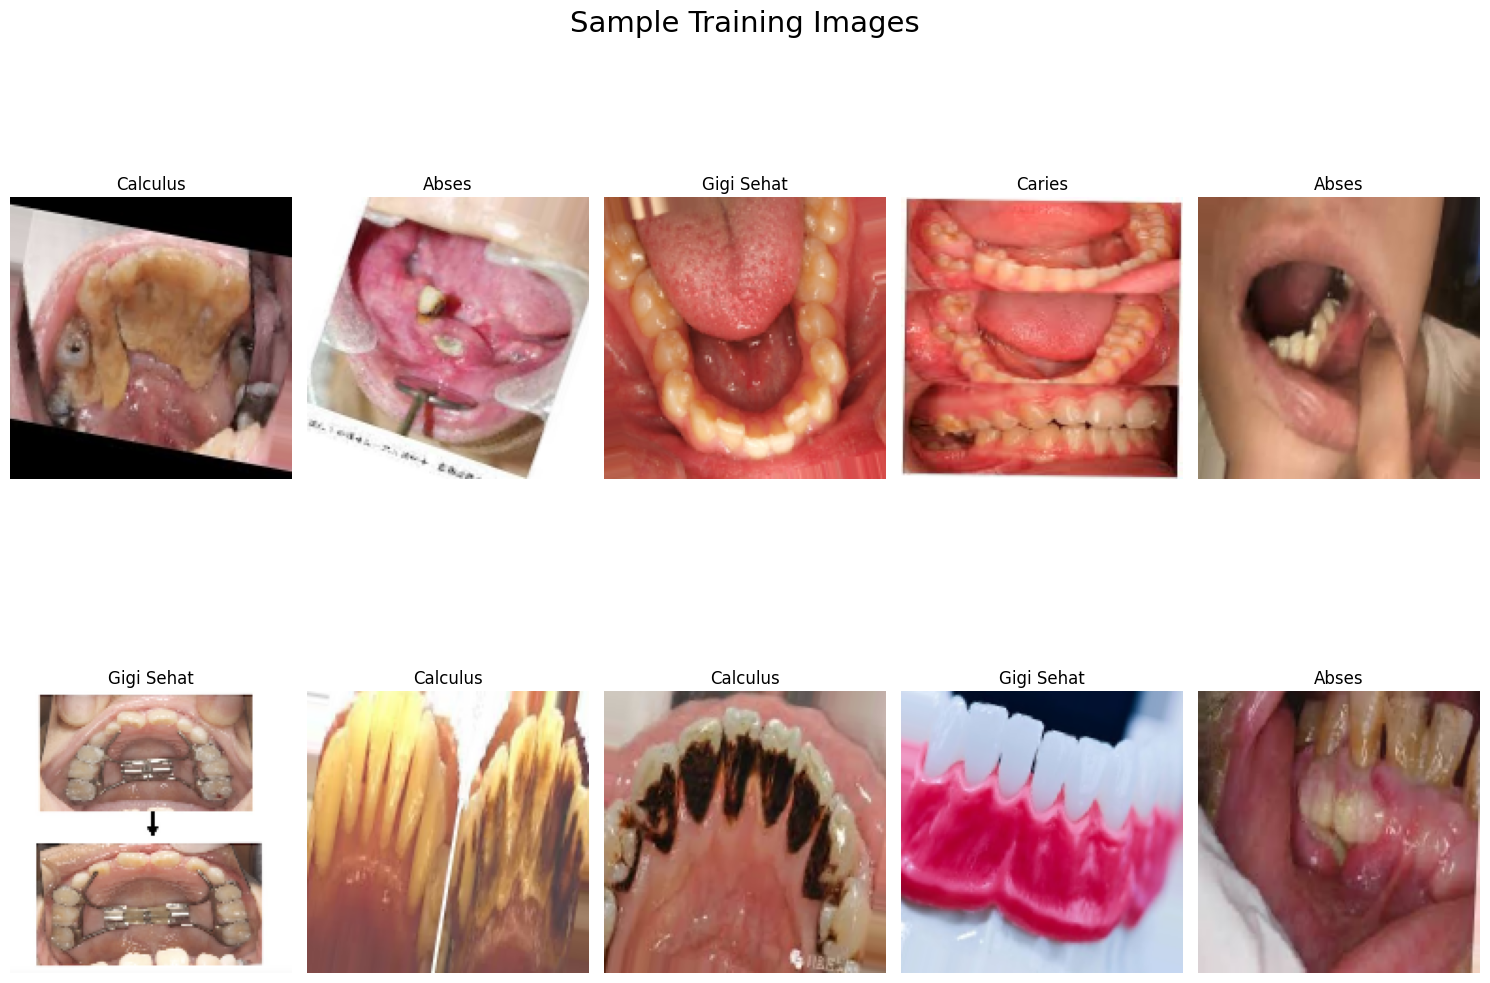

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 74, 74, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 512)               8

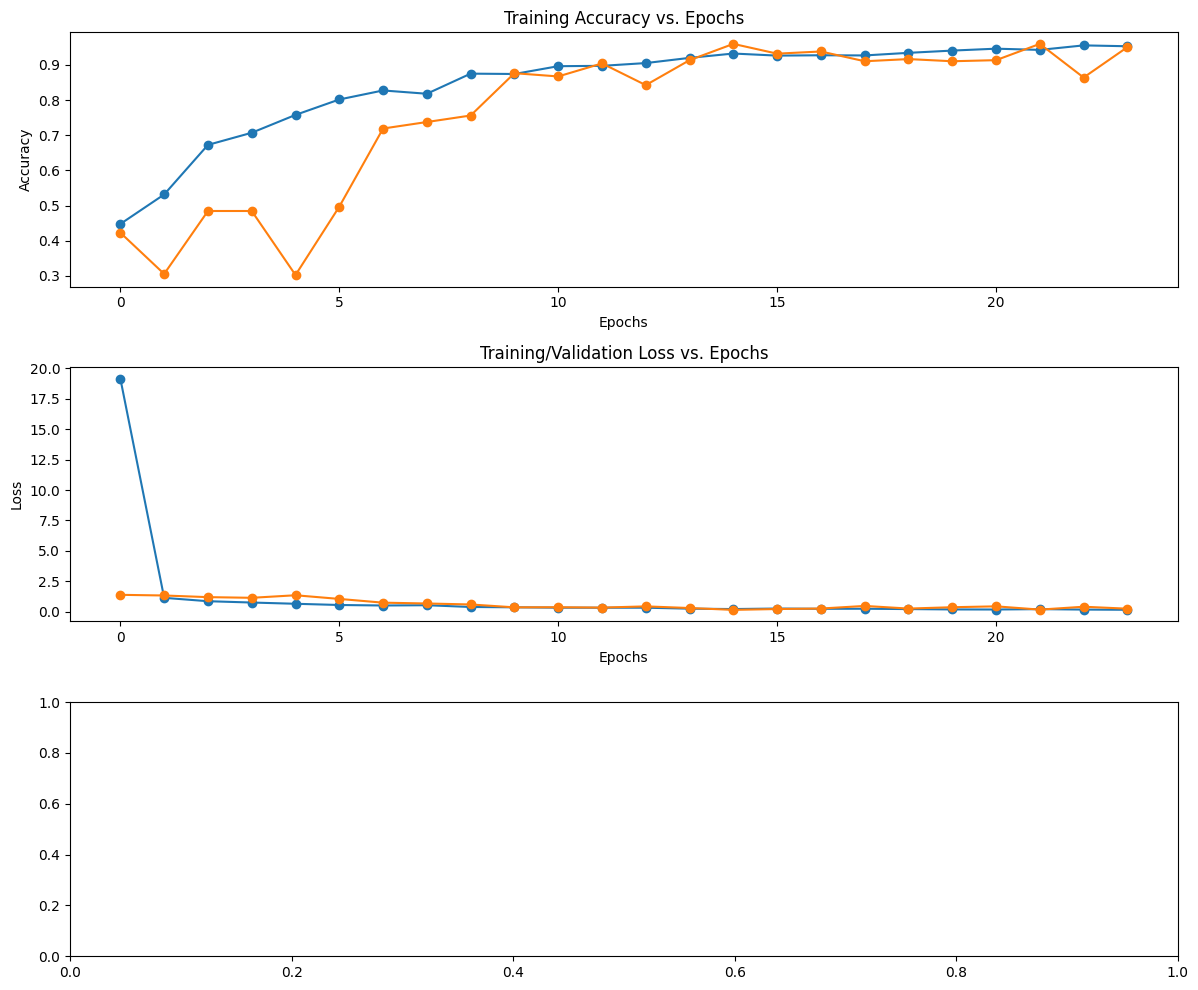

Saving 1-s2.0-S1013905218306254-gr1c.jpg to 1-s2.0-S1013905218306254-gr1c.jpg
1/1 [==============================] - 0s 227ms/step
1-s2.0-S1013905218306254-gr1c.jpg
Caries


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


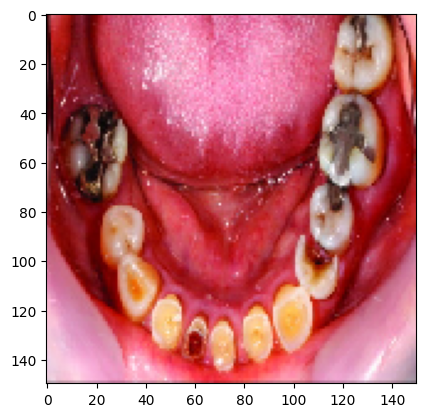

In [1]:
# Import Libraries
import tensorflow as tf
import urllib.request
import zipfile
import os
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import get_file

# Mounting Dataset Directory (assuming you are using Google Colab)
from google.colab import drive
drive.mount('/content/drive')
!ls

# Mengubah Direktori Data
import os
os.chdir("/content/drive/MyDrive")
!ls

# Dataset Preparation
# Image Dataset Path
train_dataset_path = '/content/drive/MyDrive/dental_dataset/train'
validation_dataset_path = '/content/drive/MyDrive/dental_dataset/validation'

# Define train_generator and validation_generator
train_datagen = ImageDataGenerator(
    rescale=1/255,
    fill_mode='nearest',
    rotation_range=20,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1/255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Label mapping
labels = {0: 'Abses', 1: 'Calculus', 2: 'Caries', 3: 'Gigi Sehat'}

print("Label Mapping untuk kelas pada training dan validation dataset\n")
for key, value in labels.items():
    print(f"{key} : {value}")

# Visualize Training Images Samples
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

# Define the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    # Add more Conv2D and MaxPooling2D layers as needed

    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.summary()

# Callback to stop training when accuracy reaches 95%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('val_accuracy') is not None:
            if (logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
                print("\nReached 95% accuracy so cancelling training!")
                self.model.stop_training = True

callbacks = [myCallback()]

# Optimizer, loss, and compile the model
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(train_generator, epochs=200, validation_data=validation_generator, verbose=2, callbacks=callbacks)

# Plot training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

# Predict images
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    # Predicting images
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=16)
    print(fn)

    if classes[0][0] == 1:
        print('Abses')
    elif classes[0][1] == 1:
        print('Calculus')
    elif classes[0][2] == 1:
        print('Caries')
    elif classes[0][3] == 1:
        print('Gigi Sehat')
    else:
        print("Silahkan memotret gigi anda dengan benar")

# Save the model
model.save('modelcnn2.h5')
